In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import re
import string
from collections import Counter
from typing import List
import multiprocessing as mp
from functools import partial
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#d = []
#while (1):
#  d.append(np.float64(10000000.00))

In [0]:
qasar_t_dir = "/content/drive/My Drive/quasar/quasar-t/"

In [0]:
import ast

filename = qasar_t_dir+ "questions/train_questions.json"
print(filename)

trainQ = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    trainQ.append(dictionary)
file.close()

/content/drive/My Drive/quasar/quasar-t/questions/train_questions.json


In [0]:
trainQ[0:5] 

[{'answer': '24',
  'question': 'How many points does a backgammon board have',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q8053'},
 {'answer': 'sherlock holmes',
  'question': 'Whose cases were Empty House Copper Beeches Black Peter',
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q33199'},
 {'answer': 'sam torrance',
  'question': 'Which Scottish Golfer Was Captain Of Europes 2002 Ryder Cup Team',
  'tags': [],
  'uid': 's3q33198'},
 {'answer': 'first quarter',
  'question': 'What is a two-bit moon',
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q33194'},
 {'answer': 'nissan',
  'question': "The `` Maxima '' was a model of which car",
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q33197'}]

In [0]:
filename = qasar_t_dir+ "questions/test_questions.json"
print(filename)

testQ = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    testQ.append(dictionary)
file.close()

/content/drive/My Drive/quasar/quasar-t/questions/test_questions.json


In [0]:
testQ[0:5] 

[{'answer': 'queen',
  'question': 'Which is considered the most powerful piece on the chess board',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q17641'},
 {'answer': '4',
  'question': 'If its 4:00 pm in Seattle Washington , what time is it in Portland Oregon',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q1671'},
 {'answer': 'robert redford',
  'question': "Who directed the film ` Ordinary People ' ?",
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q30552'},
 {'answer': 'attack of the killer tomatoes',
  'question': 'What film is generally considered the worst film ever made ?',
  'tags': [],
  'uid': 's3q10441'},
 {'answer': 'parrot family',
  'question': 'Macaws are the largest and most colorful species of the __________',
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q10688'}]

In [0]:
print(len(testQ))

3000


In [0]:
filename = qasar_t_dir+ "questions/dev_questions.json"
print(filename)

devQ = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    devQ.append(dictionary)
file.close()

/content/drive/My Drive/quasar/quasar-t/questions/dev_questions.json


In [0]:
devQ[0:5] 

[{'answer': 'tetanus',
  'question': 'Lockjaw is another name for which disease',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q1674'},
 {'answer': 'leek',
  'question': 'Which vegetable is a Welsh emblem ?',
  'tags': ['1tok'],
  'uid': 's3q18157'},
 {'answer': 'the guns of naverone',
  'question': 'Which film won the best special effects Oscar in 1961',
  'tags': [],
  'uid': 's3q6589'},
 {'answer': 'sitting on the dock of a bay',
  'question': "What Was Otis Redding 's Biggest Hit Coming After His Death In 1967",
  'tags': [],
  'uid': 's3q22477'},
 {'answer': 'king herod',
  'question': 'Who ordered John the Baptists execution',
  'tags': ['yes-answer-long', 'yes-answer-short'],
  'uid': 's3q17645'}]

In [0]:
print(len(devQ))

3000


In [0]:
trainQ[62:65]

[{'answer': 'eohippus',
  'question': 'The now_extinct ancestor of the horse , __________ , had a short neck , a pug muzzle , and stood no higher than a medium_sized dog .',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q12764'},
 {'answer': '2',
  'question': "How Is The Binary Numer ' 010 ' Expressed As A Decimal",
  'tags': ['1tok', 'yes-answer-long'],
  'uid': 's3q12768'},
 {'answer': 'asteroids',
  'question': 'What are these : Ceres , Juno , Iris , and Flora ?',
  'tags': ['1tok', 'yes-answer-long', 'yes-answer-short'],
  'uid': 's3q42638'}]

In [0]:
#there are fill in the blanks type of Questions - how to handle them??

In [0]:
#check the max length of the question and answer
maxanswerlen = 1
maxlenanswer = ""
maxlenquestion = ""
maxlenanswerindex = 0
for idx, trainQdict in enumerate(trainQ):
  answerlen = len (trainQdict['answer'].split())
  if answerlen > maxanswerlen:
    maxanswerlen = answerlen
    maxlenanswer = trainQdict['answer'].split()
    maxlenquestion = trainQdict['question'].split()
    maxlenanswerindex = idx
  




In [0]:
print (maxanswerlen, '\n', maxlenanswer, '\n', maxlenquestion, '\n', maxlenanswerindex) 

31 
 ['cormac', 'maccarthy,', 'the', 'gaelic', 'lord', 'of', 'blarney', 'was', 'so', 'successful', 'at', 'inventing', 'excuses', 'for', 'not', 'complying', 'with', 'the', 'demands', 'of', 'queen', 'elizabeth', 'i', 'that', 'she', 'was', 'dismissed', 'his', 'blather', 'as', "'blarney'"] 
 ['Ireland', ':', '-', 'What', 'is', 'the', 'origin', 'of', 'the', 'word', '`', 'Blarney', "'", '?'] 
 34337


In [0]:
answerlenlist = []
for trainQdict in trainQ:
  answerlenlist.append(len (trainQdict['answer'].split()))

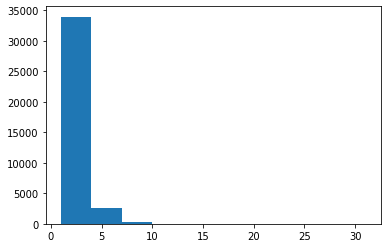

In [0]:
plt.hist((answerlenlist))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


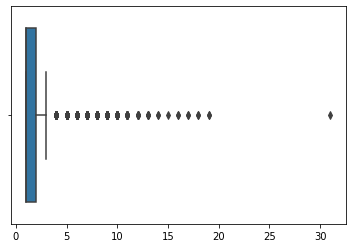

In [0]:
import seaborn as sns
sns.boxplot(answerlenlist)

In [0]:
pd.DataFrame(answerlenlist).describe()

,0
count,37012.000000
mean,1.844672
std,1.255675
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,31.000000


In [0]:
#check the max length of the question and answer
maxquestionlen = 1
maxlenquestion = ""
maxlenquestionans = ""
maxlenanswerindex = 0
for idx, trainQdict in enumerate(trainQ):
  questionlen = len (trainQdict['question'].split())
  if questionlen > maxquestionlen:
    maxquestionlen = questionlen
    maxlenquestion = trainQdict['question'].split()
    maxlenquestionans = trainQdict['answer'].split()
    maxlenanswerindex = idx

print (maxquestionlen, '\n', maxlenquestion, '\n', maxlenquestionans, '\n', maxlenanswerindex) 

92 
 ['As', 'of', 'December', '30', ',', '1997', ',', 'Disney', 'held', 'eight', 'of', 'the', 'top', 'ten', 'spots', 'on', 'the', 'All', 'Time', 'Movie', 'Video', 'Sales', 'Chart', '.The', 'Lion', 'King', '-LRB-', '1', '-RRB-', ',', 'Aladdin', '-LRB-', '2', '-RRB-', ',', 'Cinderella', '-LRB-', '3', '-RRB-', ',', 'Beauty', 'and', 'The', 'Beast', '-LRB-', '4', '-RRB-', ',', 'Snow', 'White', 'and', 'the', 'Seven', 'Dwarfs', '-LRB-', '5', '-RRB-', ',', 'Toy', 'Story', '-LRB-', '7', '-RRB-', ',', '101', 'Dalmatians', '-LRB-', '8', '-RRB-', ',', 'and', 'Pocahontas', '-LRB-', '10', '-RRB-', '.The', 'two', 'non_Disney', 'flicks', 'to', 'make', 'the', 'list', '_', 'Forrest', 'Gump', '-LRB-', '6', '-RRB-', ',', 'and', '__________'] 
 ['jurassic', 'park'] 
 7401


In [0]:
questionlenlist = []
for trainQdict in trainQ:
  questionlenlist.append(len (trainQdict['question'].split()))

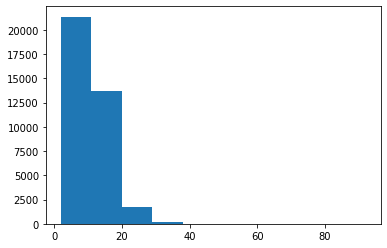

In [0]:
plt.hist((questionlenlist))
plt.show()

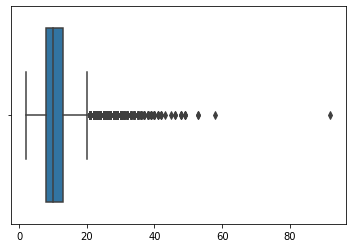

In [0]:
import seaborn as sns
sns.boxplot(questionlenlist)

In [0]:
pd.DataFrame(questionlenlist).describe()

,0
count,37012.000000
mean,10.757430
std,4.678471
min,2.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,92.000000


In [0]:
filename = qasar_t_dir+ "contexts/long/train_contexts.json"
print(filename)

trainLC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    trainLC.append(dictionary)

file.close()
trainLC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/long/train_contexts.json


[{'contexts': [[5.811907,
    'Backgammon FAQ : Different Ways of Playing Backgammon FAQ Different Ways of Playing Tables and Backgammon What is tables ? How is backgammon different from the other games of tables ? Does backgammon have official rules ? Backgammon Variants What is Nackgammon ? What is hyper-backgammon ? What is long-gammon ? What is roll-over ? What is backgammon-to-lose ? Acey-Deucey What is acey-deucey ? How do you play American acey-deucey ? How do you play European acey-deucey ? Greek Backgammon What is tavli ? How do you play portes ? How do you play plakoto ? How do you play fevga ? Other Games What is trictrac ? What is Russian backgammon ? What is French backgammon ? What is Dutch backgammon ? What is snake ? Forms of Competition What is money play ? What is match play ? What is a freeze-out match ? What is duplicate backgammon ? Table Stakes What is table stakes betting ? Why is table stakes used ? How does strategy in table stakes differ from unlimited money p

In [0]:
print(len(trainLC))

37012


In [0]:
filename = qasar_t_dir+ "contexts/short/train_contexts.json"
print(filename)

trainSC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    trainSC.append(dictionary)

file.close()
trainSC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/short/train_contexts.json


[{'contexts': [[12.680223, 'Does backgammon have official rules ?'],
   [12.533287,
    "There 's no limit to how many checkers each backgammon player may have on a point ."],
   [11.789606, "How does `` legal plays only '' work ?"],
   [11.722904, 'Q : Does backgammon have official rules ?'],
   [10.598074,
    'The number on the dice tells the player how many points or ipshe can move his marker .'],
   [10.598074,
    'The dice indicate how many points or pips a player can move its checkers .'],
   [10.598074,
    'Movement of the Checkers The roll of the dice indicates how many points , or pips , the player is to move his checkers .'],
   [10.598074,
    'Movement : The roll of the dice indicates how many points , or pips , the player is to move his checkers .'],
   [10.511074,
    "If that player does n't have any checkers on the 5 and 6 points , then he can remove checkers on lower points ."],
   [10.477706,
    'How does strategy in table stakes differ from unlimited money play ?

In [0]:
print(len(trainSC))

37012


In [0]:
filename = qasar_t_dir+ "contexts/short/test_contexts.json"
print(filename)

testSC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    testSC.append(dictionary)

file.close()
testSC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/short/test_contexts.json


[{'contexts': [[16.51039,
    'The queen is the most powerful piece in the board .'],
   [16.51039, 'She is the most powerful piece on the board .'],
   [15.283697,
    'The king is the most important , but not the most powerful piece in chess .'],
   [14.064572,
    'They are the least powerful piece on the chess board , but have the potential to become equal to the most powerful .'],
   [13.531023,
    'The code starts with a letter representing the most powerful piece on the board , not counting kings .'],
   [13.531023,
    'By the end of the 15th century , the queen became the most powerful piece on the board .'],
   [13.531023,
    'Suddenly , about 1485 , in Italy , the queen began to be the most powerful piece on the board .'],
   [13.531023,
    'Since then the queen has been the most powerful piece on the board .'],
   [13.531023,
    'Generally they are promoted to a queen since this is the most powerful piece on the board .'],
   [13.298441, 'The Queen The queen is the most

In [0]:
print(len(testSC))

3000


In [0]:
filename = qasar_t_dir+ "contexts/short/dev_contexts.json"
print(filename)

devSC = []
file = open(filename, "r")
for line in file:
    dictionary = ast.literal_eval(line)
    devSC.append(dictionary)

file.close()
devSC[:1]

/content/drive/My Drive/quasar/quasar-t/contexts/short/dev_contexts.json


[{'contexts': [[19.01995, 'Another name for tetanus is lockjaw .'],
   [11.252305,
    "C. tetani secretes a neurotoxin which causes the muscle spasms that give tetanus its other name , `` lockjaw '' ."],
   [10.166235,
    'The first sign of tetanus is a tightening of the jaw muscles that gives the disease its common name , lockjaw .'],
   [10.166235,
    "The most frequent symptom is a stiff jaw , caused by spasm of the muscle that closes the mouth -- accounting for the disease 's familiar name `` lockjaw . ''"],
   [10.043063,
    "When the child finally breathes in they will make a characteristic `` whoop '' sound which is where the disease gets its common name from ."],
   [9.638767,
    'As the infection progresses , muscle spasms in the jaw develop , hence the name lockjaw .'],
   [8.832915,
    'Tetanus MM 299-302 ; ID 1175-1185 Previous Lecture Next Lecture Table of Contents TETANUS NAME OF DISEASE : Tetanus Lockjaw ETIOLOGICAL AGENT : Clostridium tetani THE DISEASE : The dise

In [0]:
print(len(devSC))

3000


In [0]:
#the context data ontains all the sentences/paras along with their ranks.
#for longpseudocuments the author used full page text turncated to 2048 char max
#top N text documents, generally N is 20 max
#we will ignore the ranks and append
testSClist = []
for testSCdict in testSC[:1]:
  sublist = testSCdict["contexts"]
  for i, item in enumerate(sublist):
    print (len(sublist), item[1])
  #trainLClist.append(len (trainQdict['question']))

100 The queen is the most powerful piece in the board .
100 She is the most powerful piece on the board .
100 The king is the most important , but not the most powerful piece in chess .
100 They are the least powerful piece on the chess board , but have the potential to become equal to the most powerful .
100 The code starts with a letter representing the most powerful piece on the board , not counting kings .
100 By the end of the 15th century , the queen became the most powerful piece on the board .
100 Suddenly , about 1485 , in Italy , the queen began to be the most powerful piece on the board .
100 Since then the queen has been the most powerful piece on the board .
100 Generally they are promoted to a queen since this is the most powerful piece on the board .
100 The Queen The queen is the most powerful piece .
100 Queen : The Queen is the most powerful piece .
100 It is the most powerful piece next to the Queen .
100 The game of chess mirrors ancient times in that the queen is t

In [0]:
#lets try some nltk libraries to check some bert based apis
import nltk

In [0]:
from nltk.corpus import gutenberg
from nltk.tokenize.treebank import TreebankWordDetokenizer, TreebankWordTokenizer 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [0]:
!pip install deeppavlov
!pip install transformers

     |████████████████████████████████| 757kB 3.4MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 6.7MB 58.6MB/s 
     |████████████████████████████████| 8.0MB 31.6MB/s 
     |████████████████████████████████| 2.1MB 62.2MB/s 
     |████████████████████████████████| 10.4MB 52.8MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 61kB 8.9MB/s 
     |████████████████████████████████| 7.3MB 51.7MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 51kB 8.0MB/s 
     |████████████████████████████████| 1.5MB 61.4MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
     |████████████████████████████████| 71kB 10.3MB/s 
     |████████████████████████████████| 20.1MB 257kB/s 
     |████████████████████████████████| 3.9MB 65.2MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
     |██

     |████████████████████████████████| 573kB 3.2MB/s 
     |████████████████████████████████| 3.7MB 8.1MB/s 
     |████████████████████████████████| 1.0MB 39.4MB/s 
     |████████████████████████████████| 890kB 56.6MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.41-cp36-none-any.whl size=893334 sha256=0e30f5fdbd863feade1f77ab50de048f6a5609d80bc019f0aa8455c85fd0d6f5
  Stored in directory: /root/.cache/pip/wheels/22/5a/d4/b020a81249de7dc63758a34222feaa668dbe8ebfe9170cc9b1
Successfully built sacremoses


In [0]:
from deeppavlov import build_model, configs
import torch

In [0]:
!python -m deeppavlov install squad_bert

2020-04-18 14:12:00.645 INFO in 'deeppavlov.core.common.file'['file'] at line 30: Interpreting 'squad_bert' as '/usr/local/lib/python3.6/dist-packages/deeppavlov/configs/squad/squad_bert.json'
     |████████████████████████████████| 110.5MB 43kB/s 
     |████████████████████████████████| 512kB 42.6MB/s 
     |████████████████████████████████| 3.8MB 54.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8aad313a07b2b4aad8e0fa0521ec393f8534ad0417d921979ec500c61c1434f4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.0
    Uninstalling tensorboard-2

In [0]:
model = build_model(configs.squad.squad_bert, download = True)

2020-04-18 14:12:55.680 INFO in 'deeppavlov.core.data.utils'['utils'] at line 80: Downloading from http://files.deeppavlov.ai/deeppavlov_data/squad_bert.tar.gz to /root/.deeppavlov/squad_bert.tar.gz
100%|██████████| 402M/402M [04:53<00:00, 1.37MB/s]
2020-04-18 14:17:48.708 INFO in 'deeppavlov.core.data.utils'['utils'] at line 237: Extracting /root/.deeppavlov/squad_bert.tar.gz archive into /root/.deeppavlov/models
2020-04-18 14:17:53.116 INFO in 'deeppavlov.core.data.utils'['utils'] at line 80: Downloading from http://files.deeppavlov.ai/deeppavlov_data/bert/cased_L-12_H-768_A-12.zip to /root/.deeppavlov/downloads/cased_L-12_H-768_A-12.zip
100%|██████████| 404M/404M [06:11<00:00, 1.09MB/s]
2020-04-18 14:24:04.402 INFO in 'deeppavlov.core.data.utils'['utils'] at line 237: Extracting /root/.deeppavlov/downloads/cased_L-12_H-768_A-12.zip archive into /root/.deeppavlov/downloads/bert_models
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt











The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.





Instructions for updating:
Use standard file APIs to check for files with this prefix.


2020-04-18 14:24:26.230 INFO in 'deeppavlov.core.models.tf_model'['tf_model'] at line 51: [loading model from /root/.deeppavlov/models/squad_bert/model]



INFO:tensorflow:Restoring parameters from /root/.deeppavlov/models/squad_bert/model


In [0]:
def remove_articles(text):
    return re.sub(r'\b(a|an|the)\b', ' ', text)

def white_space_fix(text):
    return ' '.join(text.split())

def remove_punc(text):
    exclude = set(string.punctuation)
    return ''.join(ch for ch in text if ch not in exclude)

def lower(text):
    return text.lower()

def normalize_answer(s: str) -> str:
    return white_space_fix(remove_articles(remove_punc(lower(s))))

In [0]:
def exact_match_metric(iy_predicted_list: List[str], iground_truth: str):
  y_predicted = [normalize_answer(y_pred) for y_pred in iy_predicted_list]
  ground_truth =  normalize_answer( iground_truth )
  res = [ele for ele in y_predicted if(ele in ground_truth)]
  return (sum([(bool(res))]))

In [0]:
def f1_score_metric(iy_predicted_list: List[str], iground_truth: str):
  f1_total = 0.0
  precisions = []
  recalls = []
  f1s = []
  y_predicted = [normalize_answer(y_pred) for y_pred in iy_predicted_list]
  ground_truth =  normalize_answer( iground_truth )
  
  for prediction in y_predicted:
      prediction_tokens = prediction.split()
      gt_tokens = ground_truth.split()
      #print(prediction_tokens)
      #print(gt_tokens)
      if len(gt_tokens) == 0 or len(prediction_tokens) == 0:
          precisions.append(float(gt_tokens == prediction_tokens))
          recalls.append(float(gt_tokens == prediction_tokens))
          f1s.append(float(gt_tokens == prediction_tokens))
          continue
      common = Counter(prediction_tokens) & Counter(gt_tokens)
      num_same = sum(common.values())
      #print(common, num_same)
      if num_same == 0:
          precisions.append(0.0)
          recalls.append(0.0)
          f1s.append(0.0)
          continue
      precision = 1.0 * num_same / len(prediction_tokens)
      recall = 1.0 * num_same / len(gt_tokens)
      f1 = (2 * precision * recall) / (precision + recall)
      f1s.append(f1)
      precisions.append(precision)
      recalls.append(recall)

  f1_total = max(f1s)    
  return (max(precisions), max(recalls), max(f1s))

In [0]:
def get_predicted_answer(iQues, iContext, ingram, imodel, 
                         itopN_pred_ans, iRemove_word_list, id):
  
  """
  Tokenize the context containing multiple paragraphs
  Each para  - broken to sentence
  """
  paras = []
  words = []
  predicted_ans = ""
  y_predicted_lst = []
  
  for ConextDict in iContext[id:id+1]:
    sublist = ConextDict["contexts"]
    for i, item in enumerate(sublist):
      sent = (item[1]) #TreebankWordDetokenizer().detokenize(item[1])
      paras.append(sent)
    
  ##lets do the same for the question
  ques_dict = iQues[id:id+1][0]
  ques = (ques_dict['question'])

  #get model prediction
  predicted_ans_list = []
  for para in paras:
    predicted_ans = imodel([para], [ques])
    predicted_ans_list.append(sum(predicted_ans, []))
    #print(predicted_ans)  
  
  predicted_ans_list = sorted(predicted_ans_list, key = lambda x: x[2], 
                                reverse=True)
  for i in range(itopN_pred_ans):
    word_list = lower(predicted_ans_list[i][0]).split()
    predicted_ans_list[i][0] = (' '.join(
        [i for i in word_list if i not in iRemove_word_list]))
    y_predicted_lst.append(predicted_ans_list[i][0])
  
  
  actual_ans = ques_dict['answer']
  print (y_predicted_lst, ',' ,normalize_answer( actual_ans ))

  EM = exact_match_metric(y_predicted_lst, actual_ans)
  precision, recall, f1 = f1_score_metric(y_predicted_lst, actual_ans)

  return  y_predicted_lst, [normalize_answer(actual_ans), normalize_answer(ques), EM, precision, recall, f1]


In [0]:
import time
id = 7401
ingram = 2
itopN_pred_ans = 10

Remove_word_list = ['lrb-' , '-rrb', '-lrb-', '-lsb-', '-rrb-', '-rsb-']

pred_ans_list_col_names = {}

for i in range(itopN_pred_ans):
  pred_ans_list_col_names[('pred_ans_' + str(i))] = []

df_pred= pd.DataFrame(pred_ans_list_col_names)
df_metrics = pd.DataFrame({'actual_ans': [], 'actual_ques': [], 'EM': [], 'precision': [], 'recall': [], 'f1': []})

t1 = time.time()

#change devQ to testQ and devLC to testLC in order to run the test and dev
#running only 200 records due to run taking long time- less RAM and also can't parallelize
for id, testQdict in enumerate(testQ[0:150]):
  pred, metrics = get_predicted_answer(testQ, testSC,  2, model, itopN_pred_ans, Remove_word_list, id)
  
  for i in  range(itopN_pred_ans):
    pred_ans_list_col_names[('pred_ans_' + str(i))] = pred[i]

  df_pred = df_pred.append(pred_ans_list_col_names, ignore_index=True)

  df_metrics = df_metrics.append({'actual_ans': metrics[0], 'actual_ques': metrics[1], 'EM': metrics[2], 
                              'precision': metrics[3], 'recall': metrics[4], 'f1': metrics[5]}, ignore_index=True)

t2 = time.time()
print('Time for whole code to run: ', (t2-t1))

['queen', 'rook', 'the queen the queen', 'queen queens', 'yod knight', 'queen', 'queen', 'the queen', 'pawns', 'the king the king'] , queen
['09:50 am', 'what to do in portland if/when it rains', '10:40', 'overnight', 'september', '1pm', 'when', 'real speed date', 'do ?', '10:00 a.m'] , 4
['john bailey', 'redford', 'george roy hill', 'robert redford', 'robert redford', 'sidney pollack', 'george roy hill', 'alvin sargent', 'lasse hallstrom', 'robert redford'] , robert redford
['hobgoblins 2', '28 weeks later', 'ecks vs. sever', 'caddyshack ii', 'lsb- it -rsb', 'spares', 'plan 9 from outer space 1959 plan 9', '`` what are they up to ?', 'five point palm exploding heart technique', 'the uk sun page three girls'] , attack of killer tomatoes
['what continent', 'parrot', 'amazon', 'lories', 'they are the largest birds in the parrot family', 'tyrant flycatchers', 'neotropical parrots', 'zigzag herons', 'colombia', 'it is known for being among the largest , yet gentlest of the amazons'] , parr

In [0]:
df_pred

,pred_ans_0,pred_ans_1,pred_ans_2,pred_ans_3,pred_ans_4,pred_ans_5,pred_ans_6,pred_ans_7,pred_ans_8,pred_ans_9
0,queen,rook,the queen the queen,queen queens,yod knight,queen,queen,the queen,pawns,the king the king
1,09:50 am,what to do in portland if/when it rains,10:40,overnight,september,1pm,when,real speed date,do ?,10:00 a.m
2,john bailey,redford,george roy hill,robert redford,robert redford,sidney pollack,george roy hill,alvin sargent,lasse hallstrom,robert redford
3,hobgoblins 2,28 weeks later,ecks vs. sever,caddyshack ii,lsb- it -rsb,spares,plan 9 from outer space 1959 plan 9,`` what are they up to ?,five point palm exploding heart technique,the uk sun page three girls
4,what continent,parrot,amazon,lories,they are the largest birds in the parrot family,tyrant flycatchers,neotropical parrots,zigzag herons,colombia,"it is known for being among the largest , yet ..."
...,...,...,...,...,...,...,...,...,...,...
145,1843,1843,1875,1843,1875,1874,1915,1860,1843,1843
146,constitutional right,constitutional right,tobacco,what are the different types of firearms,alcohol advertising,pipe bomb,tobacco acquisition disorder,` word,powermaster,firefight
147,american express,the diner club card,what is a pin,what to do if credit card is lost or stolen,what is credit card,an unsecured card,what information,what,what kind of fees,what is credit card
148,javert,javert,javert,javert,javert,javert,javert,javert,ja,inspector javert


In [0]:
df_metrics

,actual_ans,actual_ques,EM,precision,recall,f1
0,queen,which is considered most powerful piece on che...,1.0,1.000000,1.0,1.000000
1,4,if its 400 pm in seattle washington what time ...,0.0,0.000000,0.0,0.000000
2,robert redford,who directed film ordinary people,1.0,1.000000,1.0,1.000000
3,attack of killer tomatoes,what film is generally considered worst film e...,0.0,0.000000,0.0,0.000000
4,parrot family,macaws are largest and most colorful species of,1.0,1.000000,1.0,0.666667
...,...,...,...,...,...,...
145,1846,in what year was first christmas card produced,0.0,0.000000,0.0,0.000000
146,refreshing,bureau of alcohol tobacco and firearms bans wh...,0.0,0.000000,0.0,0.000000
147,diners club,what was first credit card,0.0,0.333333,0.5,0.400000
148,javert,what is name of police inspector that is bent ...,1.0,1.000000,1.0,1.000000


In [0]:
df_metrics['f1'].mean(), df_metrics['EM'].mean(), df_metrics['precision'].mean() , df_metrics['recall'].mean() 

(0.6930565730565734, 0.6533333333333333, 0.707063492063492, 0.7148148148148148)

In [0]:
writePath = qasar_t_dir + "questions/short_metric_test.txt"
with open(writePath, 'a') as f:
    f.write(df_metrics.to_string(header = False, index = False))
f.close()

In [0]:
writePath = qasar_t_dir + "questions/short_ans_pred_test.txt"
#pred_ans_0	pred_ans_1	pred_ans_2	pred_ans_3	pred_ans_4	pred_ans_5	pred_ans_6	pred_ans_7	pred_ans_8	pred_ans_9
with open(writePath, 'a') as f:
    f.write(df_pred.to_string(header = False, index = False))
f.close()